In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install cellphonedb

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.1/169.1 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.6/77.6 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.4/255.4 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 82.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 102.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 3.9 MB/s eta 0:00:00
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11373 sha256=8139010cd4637b7e22e064130f53b77a438a18b816c73c58ee877811e0c29e0d
  Stored in directory: /root/.

In [ ]:
import pandas as pd
import glob
import os
import numpy as np

In [ ]:
from IPython.display import HTML, display
from cellphonedb.utils import db_releases_utils

display(HTML(db_releases_utils.get_remote_database_versions_html()['db_releases_html_table']))

In [ ]:
# -- Version of the databse
cpdb_version = 'v5.0.0'

# -- Path where the input files to generate the database are located
cpdb_target_dir = os.path.join('cellphonedb'+os.sep+'data', cpdb_version)

In [ ]:
meta_file_path = "Revision"+os.sep+"DGE"+os.sep+"metadataTest.tsv"
counts_file_path = "Revision"+os.sep+"DGE"+os.sep+'adata.h5ad'
out_path = 'Revision/Cellphonedb'
cpdb_file_path = 'cellphonedb'+os.sep+'data'+os.sep+cpdb_version+os.sep+'cellphonedb.zip'

In [ ]:
import anndata
adata = anndata.read_h5ad(counts_file_path)

In [ ]:
metadata = pd.read_csv(meta_file_path, sep = '\t')

In [ ]:
metadata.index = metadata['Unnamed: 0']
metadata = metadata.drop('Unnamed: 0', axis=1)
metadata

,cell_type
Unnamed: 0,
Sample_1,beta
Sample_2,beta
Sample_3,beta
Sample_4,beta
Sample_5,beta
...,...
D30-8_90,alpha
D30-8_91,mesenchymal
D30-8_92,alpha


In [ ]:
import pickle

all_folds = []

for fold in range(1, 6):
    with open(gdrivePath+os.sep+f"data/5CV/fold_skf_3000_{fold}.pkl", "rb") as f:
        fold_data = pickle.load(f)
        all_folds.append(fold_data)



In [ ]:
import pickle

gen_dict = []

for fold in range(1, 6):
    with open(gdrivePath+os.sep+f"results/MAF-FB_skf_fold_{fold}.pkl", "rb") as f:
        gen_data = pickle.load(f)
        gen_dict.append(gen_data)



In [ ]:
df = gen_dict[0]['X_train_gen']
df

array([[ 5.55627687,  3.34533237,  3.9511097 , ...,  0.13388331,
        -0.60908224,  4.37790402],
       [ 5.34934616,  4.59573777,  3.487377  , ...,  0.13388331,
        -0.60908224,  5.41796719],
       [ 4.60045139,  3.03227371,  2.9142621 , ...,  2.58179183,
        -0.60908224,  0.23254449],
       ...,
       [ 9.59024525, -5.86824369,  6.29266739, ...,  6.12164259,
        -1.62598813, -0.67904401],
       [ 9.80016613, -7.4941678 ,  3.04823565, ...,  3.39566445,
         0.61018997,  1.5001874 ],
       [12.36060429, 11.3479538 , -1.93050301, ...,  0.24396881,
         2.77274108,  6.14510918]])

In [ ]:
metadata = pd.DataFrame(gen_dict[0]['y_train_gen'])
metadata.rename(columns = {0:'cell_type'}, inplace = True)
metadata

,cell_type
0,PSC
1,PSC
2,PSC
3,PSC
4,PSC
...,...
18400,schwann
18401,schwann
18402,schwann
18403,schwann


In [ ]:
import anndata
adata = anndata.AnnData(df)
adata

AnnData object with n_obs × n_vars = 18405 × 3000

In [ ]:
adata.obs = metadata
adata.obs

,cell_type
0,PSC
1,PSC
2,PSC
3,PSC
4,PSC
...,...
18400,schwann
18401,schwann
18402,schwann
18403,schwann


In [ ]:
vars = pd.DataFrame()
vars["gene_ids"] = all_folds[0]['X_train'].columns
vars.index = all_folds[0]['X_train'].columns
vars["feature_types"] = "Gene Expression"
vars

,gene_ids,feature_types
GCG,GCG,Gene Expression
INS,INS,Gene Expression
TTR,TTR,Gene Expression
IAPP,IAPP,Gene Expression
REG1A,REG1A,Gene Expression
...,...,...
RHPN2,RHPN2,Gene Expression
MRPL2,MRPL2,Gene Expression
CDKN1B,CDKN1B,Gene Expression
CTSS,CTSS,Gene Expression


In [ ]:
adata.var = vars

In [ ]:
adata.write("Cellphonedb"+os.sep+'adata_MAF-FB_fold0.h5ad')

In [ ]:
metadata.to_csv("Cellphonedb"+os.sep+"metadata_MAF-FB_fold0.tsv", sep = '\t')

---------------

In [ ]:
meta_file_path ="Cellphonedb"+os.sep+"metadata_MAF-FB_fold0.tsv"

In [ ]:
counts_file_path = "Cellphonedb"+os.sep+"adata_MAF-FB_fold0.h5ad"

In [ ]:
cpdb_file_path = 'cellphonedb'+os.sep+'data'+os.sep+cpdb_version+os.sep+'cellphonedb.zip'
cpdb_file_path

'gdrive/My Drive/Sevgi Phd/conference(second_tik)/cellphonedb/data/v5.0.0/cellphonedb.zip'

In [ ]:
out_path = gdrivePath +os.sep+'Cellphonedb'

In [ ]:
from cellphonedb.src.core.methods import cpdb_statistical_analysis_method

cpdb_results = cpdb_statistical_analysis_method.call(
    cpdb_file_path = cpdb_file_path,                 # mandatory: CellphoneDB database zip file.
    meta_file_path = meta_file_path,                 # mandatory: tsv file defining barcodes to cell label.
    counts_file_path = counts_file_path,             # mandatory: normalized count matrix - a path to the counts file, or an in-memory AnnData object
    counts_data = 'hgnc_symbol',                     # defines the gene annotation in counts matrix.
    output_path = out_path,                          # Path to save results.
    )

Reading user files...
The following user files were loaded successfully:
gdrive/My Drive/Sevgi Phd/conference(second_tik)/Revision/Cellphonedb/adata_FB-paper_fold0.h5ad
gdrive/My Drive/Sevgi Phd/conference(second_tik)/Revision/Cellphonedb/metadata_FB-paper_fold0.tsv
[ ][CORE][06/08/25-14:04:16][INFO] [Cluster Statistical Analysis] Threshold:0.1 Iterations:1000 Debug-seed:-1 Threads:4 Precision:3
[ ][CORE][06/08/25-14:04:16][INFO] Running Real Analysis
[ ][CORE][06/08/25-14:04:16][INFO] Running Statistical Analysis


100%|██████████| 1000/1000 [05:15<00:00,  3.17it/s]


[ ][CORE][06/08/25-14:09:32][INFO] Building Pvalues result
[ ][CORE][06/08/25-14:09:32][INFO] Building results
Saved deconvoluted to gdrive/My Drive/Sevgi Phd/conference(second_tik)/Revision/Cellphonedb/statistical_analysis_deconvoluted_08_06_2025_140932.txt
Saved deconvoluted_percents to gdrive/My Drive/Sevgi Phd/conference(second_tik)/Revision/Cellphonedb/statistical_analysis_deconvoluted_percents_08_06_2025_140932.txt
Saved means to gdrive/My Drive/Sevgi Phd/conference(second_tik)/Revision/Cellphonedb/statistical_analysis_means_08_06_2025_140932.txt
Saved pvalues to gdrive/My Drive/Sevgi Phd/conference(second_tik)/Revision/Cellphonedb/statistical_analysis_pvalues_08_06_2025_140932.txt
Saved significant_means to gdrive/My Drive/Sevgi Phd/conference(second_tik)/Revision/Cellphonedb/statistical_analysis_significant_means_08_06_2025_140932.txt


In [ ]:
import os
import anndata as ad
import pandas as pd
import ktplotspy as kpy
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#means = pd.read_csv(out_path+os.sep+"train_fold0"+"/statistical_analysis_means_08_06_2025_112823.txt", sep="\t")
#significant_means = pd.read_csv(out_path+os.sep+"train_fold0"+"/statistical_analysis_significant_means_08_06_2025_112823.txt", sep="\t")
pvals = pd.read_csv(out_path+os.sep+"MAF-FB_fold0"+"/statistical_analysis_pvalues_08_06_2025_140932.txt", sep="\t")
#decon = pd.read_csv(out_path+os.sep+"train_fold0"+"/statistical_analysis_deconvoluted_08_06_2025_112823.txt", sep="\t")

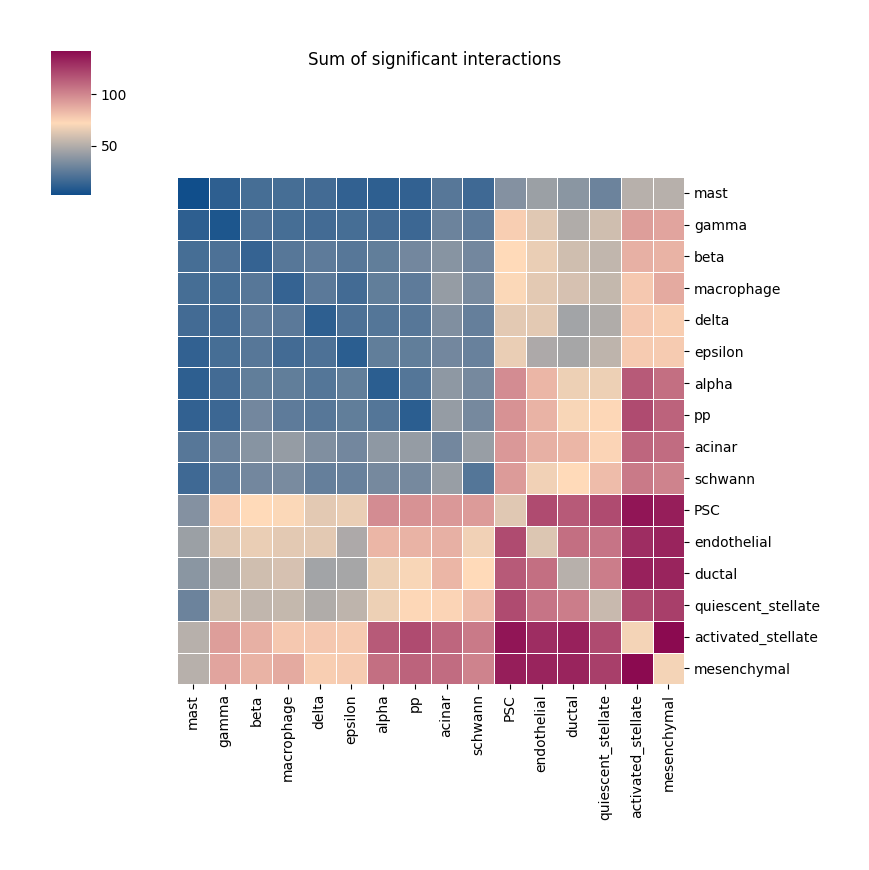

In [ ]:
plt = kpy.plot_cpdb_heatmap(pvals = pvals,#cpdb_results['pvalues'],
                      degs_analysis = False,
                      figsize = (8, 8),
                      title = "Sum of significant interactions")

In [ ]:
plt.savefig(gdrivePath + os.sep + "Cellphonedb" + os.sep + "heatmap_MAF-FB_fold0.svg", format='svg')

Comparison Statistical Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load means.txt for real and synthetic
real = pd.read_csv("val_fold0"+"/statistical_analysis_means_08_06_2025_102025.txt", sep='\t')
synth = pd.read_csv("MAF-FB_fold0"+"/statistical_analysis_means_08_06_2025_140932.txt", sep='\t')

# Identify cell-type interaction columns (all columns after metadata)
meta_cols = ['id_cp_interaction', 'interacting_pair', 'partner_a', 'partner_b',
             'gene_a', 'gene_b', 'secreted', 'receptor_a', 'receptor_b', 'annotation_strategy','is_integrin','directionality','classification']
celltype_cols = [c for c in real.columns if c not in meta_cols]

# Keep only intersecting celltype columns between real and synthetic
common_cols = list(set(celltype_cols) & set(synth.columns))

# Align rows by interacting_pair (safe to use as unique ID)
real_common = real.set_index('interacting_pair')[common_cols]
synth_common = synth.set_index('interacting_pair')[common_cols]

# Convert to numeric
real_common = real_common.apply(pd.to_numeric, errors='coerce')
synth_common = synth_common.apply(pd.to_numeric, errors='coerce')

real_flat = real_common.values.flatten()
synth_flat = synth_common.values.flatten()


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(real_flat, synth_flat)
rmse = np.sqrt(mse)

In [ ]:
#train-test
print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}")

MSE: 0.4123, RMSE: 0.6421


In [ ]:
#FB-MOE-test
print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}")

MSE: 0.4253, RMSE: 0.6522


In [ ]:
#CTGAN-test
print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}")

MSE: 0.5262, RMSE: 0.7254


In [ ]:
#TVAE-test
print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}")

MSE: 0.5258, RMSE: 0.7251


In [ ]:
#GC-test
print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}")

MSE: 0.7639, RMSE: 0.8740


In [ ]:
#FB-paper-test
print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}")

MSE: 0.4569, RMSE: 0.6760


------------------------------------------------

Dot plots with first DEG

TOP-1 DEGs

In [ ]:
degs_file_path = "DGE"+ os.sep +'top20_exclusive.tsv'
deg = pd.read_csv(degs_file_path, sep='\t')

In [ ]:
top_1_genes = deg.groupby('cluster').head(1)
top_1_genes

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
0,6.263654e-59,6.115082,0.830,0.132,1.879096e-55,PSC,DCN
8,0.000000e+00,9.751524,0.974,0.431,0.000000e+00,acinar,SYCN
28,0.000000e+00,8.160474,1.000,0.937,0.000000e+00,activated_stellate,COL1A1
43,0.000000e+00,6.436521,1.000,0.988,0.000000e+00,alpha,GCG
61,0.000000e+00,6.642219,0.664,0.369,0.000000e+00,beta,DLK1
81,0.000000e+00,7.700113,0.993,0.833,0.000000e+00,delta,SST
98,2.073795e-141,9.942354,0.246,0.271,6.221384e-138,ductal,FGF19
118,0.000000e+00,10.940745,0.747,0.402,0.000000e+00,endothelial,ROBO4
138,5.040939e-60,11.871251,1.000,0.276,1.512282e-56,epsilon,GHRL
153,4.080070e-46,4.581152,0.700,0.725,1.224021e-42,gamma,FGB


In [ ]:
deg = top_1_genes['gene']
deg = deg.tolist()

In [ ]:
import math

unique_deg = []
[unique_deg.append(x) for x in deg if x not in unique_deg and not (isinstance(x, float) and math.isnan(x))]

len(unique_deg)


16

In [ ]:
means = pd.read_csv(out_path+os.sep+"GC_fold0"+"/statistical_analysis_means_08_06_2025_135916.txt", sep="\t")
#significant_means = pd.read_csv(out_path+os.sep+"train_fold0"+"/statistical_analysis_significant_means_08_06_2025_112823.txt", sep="\t")
pvals = pd.read_csv(out_path+os.sep+"GC_fold0"+"/statistical_analysis_pvalues_08_06_2025_135916.txt", sep="\t")
#decon = pd.read_csv(out_path+os.sep+"train_fold0"+"/statistical_analysis_deconvoluted_08_06_2025_112823.txt", sep="\t")

In [ ]:
import anndata
counts_file_path = Cellphonedb/GC_fold0"+os.sep+"adata_GC_fold0.h5ad"
adata = anndata.read_h5ad(counts_file_path)

In [ ]:
p = kpy.plot_cpdb(
    adata=adata,
    cell_type1=".",
    cell_type2=".",  # this means all cell-types
    means=means,
    pvals=pvals,
    celltype_key="cell_type",
    genes=unique_deg,
    figsize=(15, 10),
    title="interacting interactions!",
)


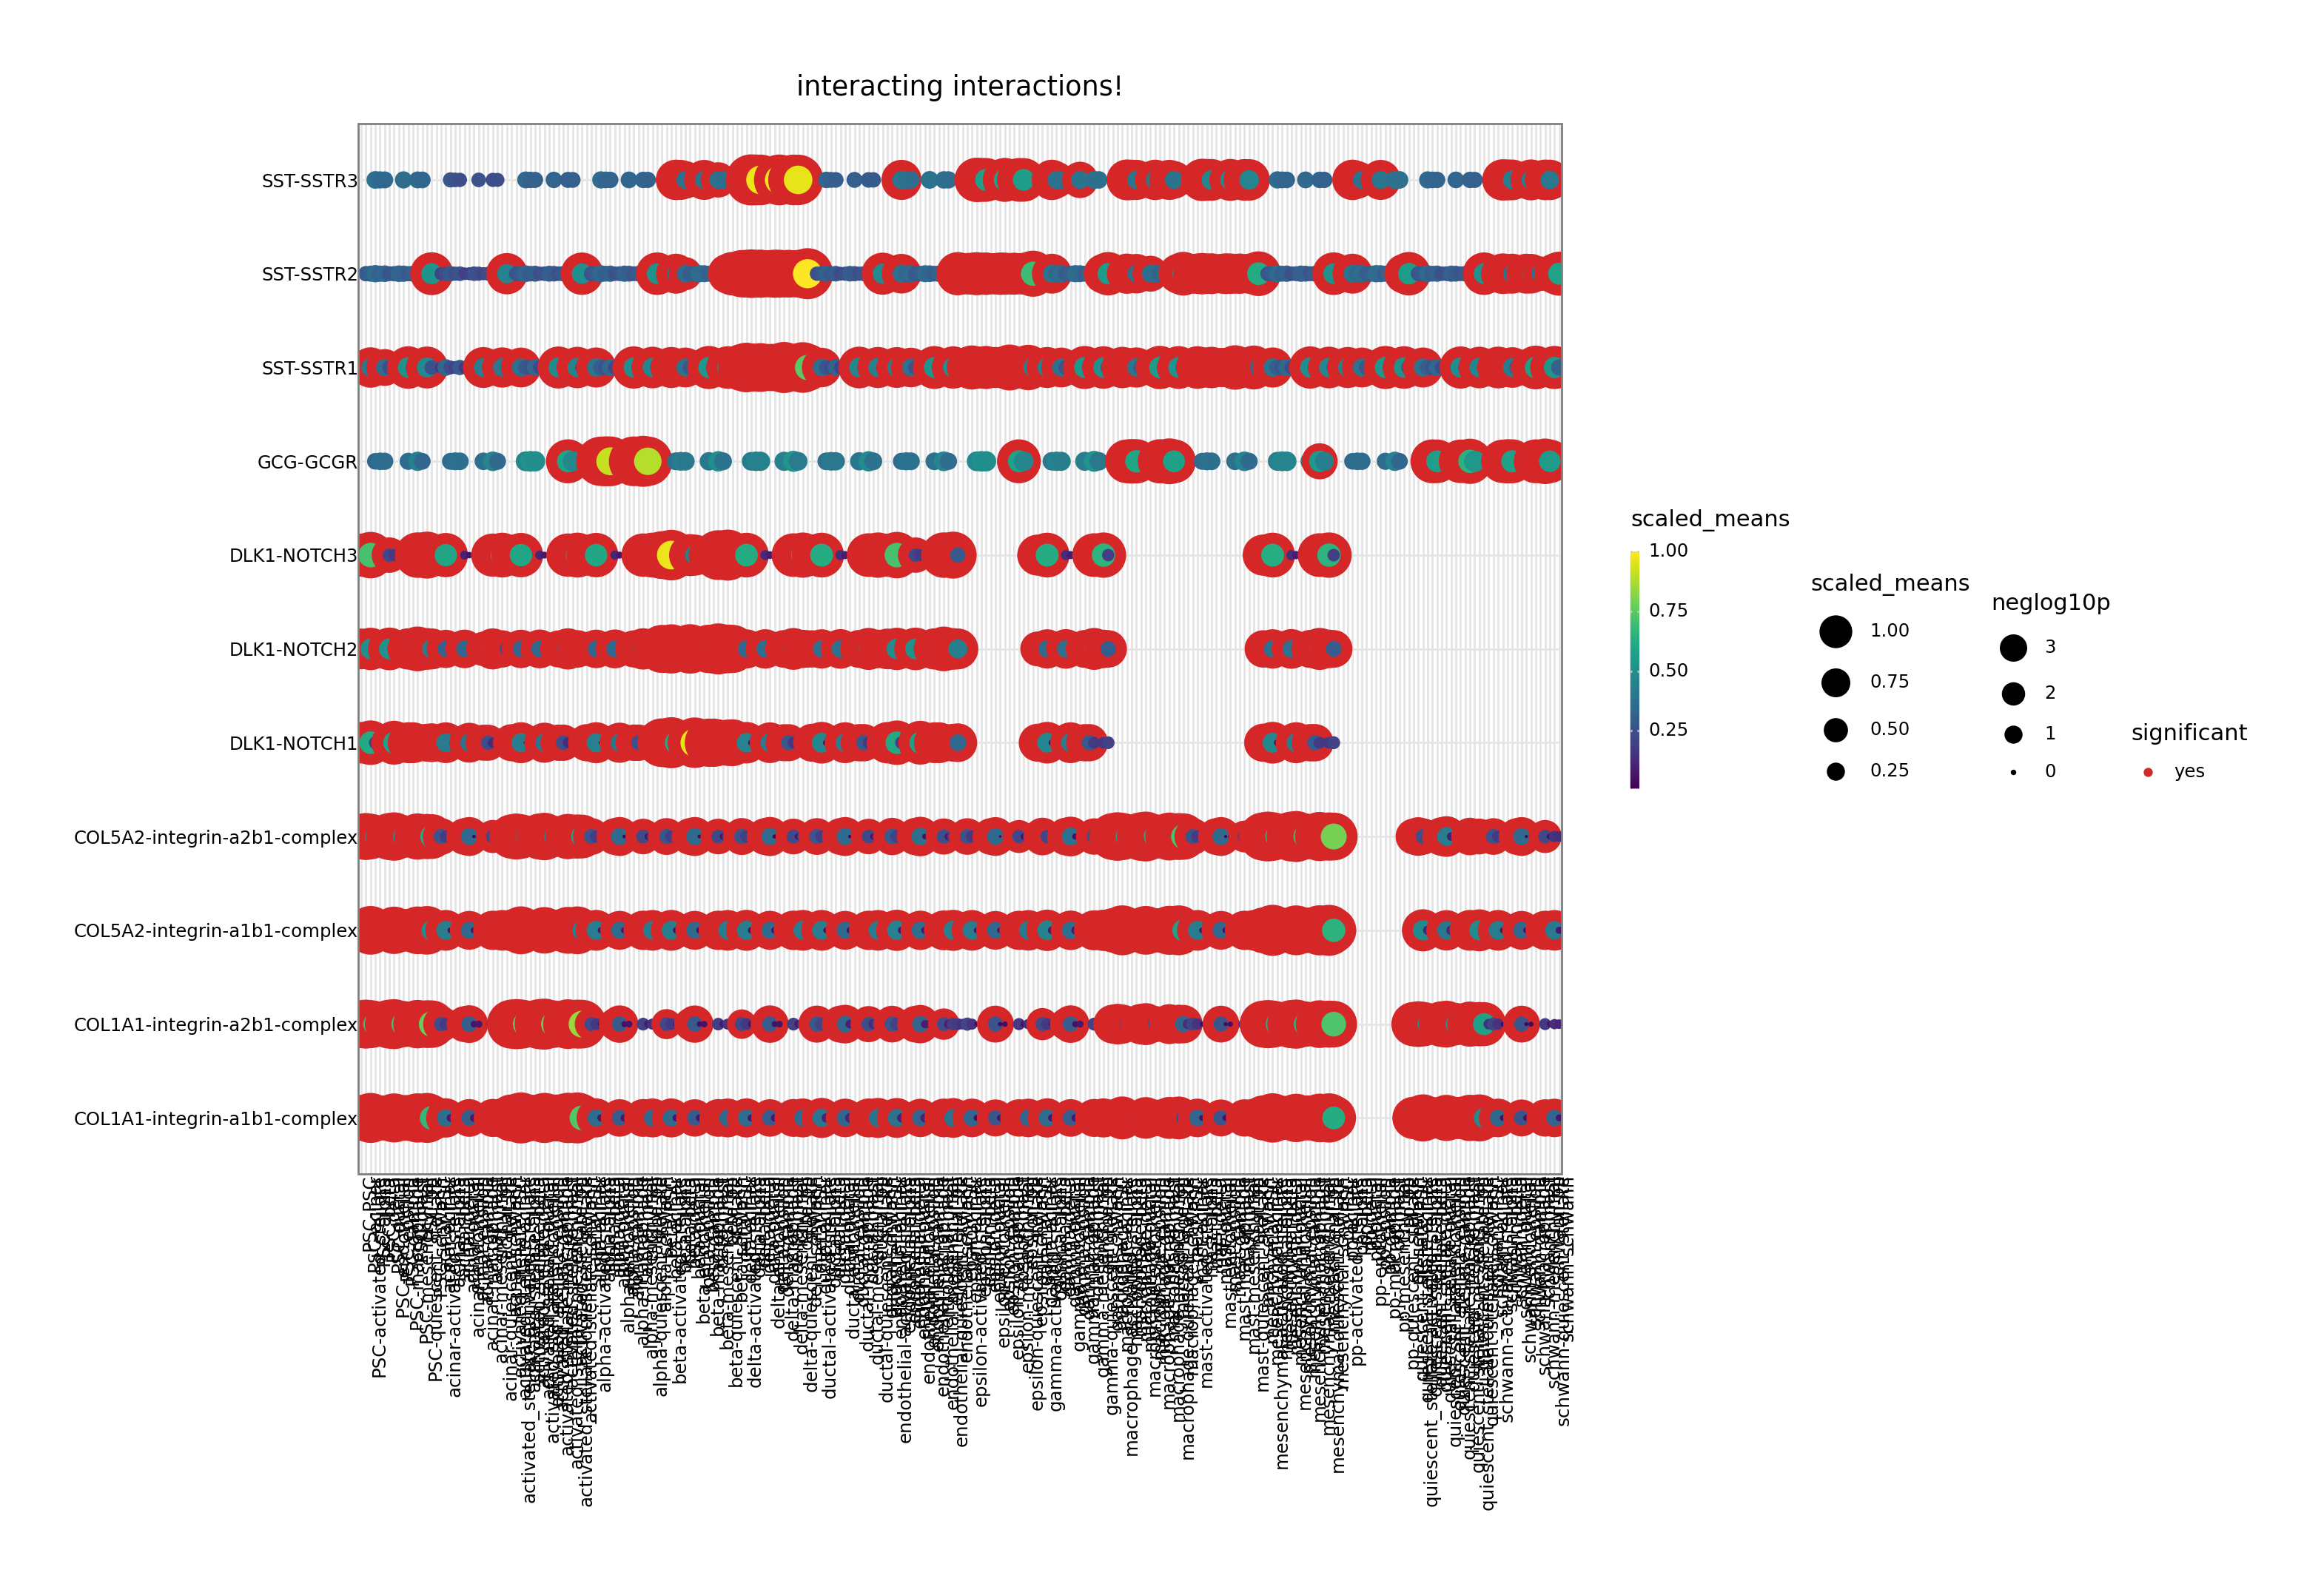

In [ ]:
p

In [ ]:
p.save(Cellphonedb" + os.sep + "dotPlot_GC.pdf", format="pdf", width=40, height=10, dpi=900,limitsize=False)